# Visualization

<br>



In [166]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [120]:
nb_samples = tX.shape[0]
nb_features = tX.shape[1]
print("Training data facts\n")
print("Number of samples: {} \nNumber of features: {}".format(nb_samples, nb_features))
print("Shape of data matrix {}".format(tX.shape))

Training data facts

Number of samples: 250000 
Number of features: 30
Shape of data matrix (250000, 30)


### Background information on the data

The data comes from proton-proton collision simulation performed in CERN. Each collision -- also known as an event -- produces a vector (a snapshot) containing the information of the collision. From each event we extract 30 important physical measures (features) that we collect into a new vector that we will use as a data point for classification. The objective is to figure out if an event contains key signatures -- such as decay patterns -- of the Higgs boson, each sample is labeled -1 if it is just background noise, and 1 if it contains signal for a Higgs boson.

Ref: (TODO add this as a reference in the 2 page document as the background paper)

https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

In [121]:
signal, noise = 1, -1
nb_signal = sum(y == signal)
nb_noise = sum(y == noise)

print("Fraction of signal in data = {0:.2f}".format(nb_signal / nb_samples))
print("Fraction of noise in data = {0:.2f}".format(nb_noise / nb_samples))

Fraction of signal in data = 0.34
Fraction of noise in data = 0.66


### Data pre processing 
#### TODO also clean the test (not only train)

It can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In the following we check how many and which contan such errors

In [122]:
error_threshold = -999.0

In [123]:
idx_with_error = []
idx_without_error = []
for i in range(nb_samples):
    if np.any(tX[i,:] <= error_threshold):
        idx_with_error.append(i)
    else:
        idx_without_error.append(i)

In [124]:
print("There are {} samples with errors".format(len(idx_with_error)))
print("That is {0:.2f}% of the train data".format(len(idx_with_error)/nb_samples*100))

There are 181886 samples with errors
That is 72.75% of the train data


It seems like most samples have errors (at least one per sample). Maybe it is worth looking at samples with have many errors?

## Data exploration

We perform some simple PCA to check if in the leading axis the data is seperable.

Looking at the 2 leading axis shows that it is not an easy task, there is no clear sperability, while the 3 leading axis give a better picture, it is also still far from being seperable.

In [167]:
from sklearn.decomposition import PCA
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(tX)

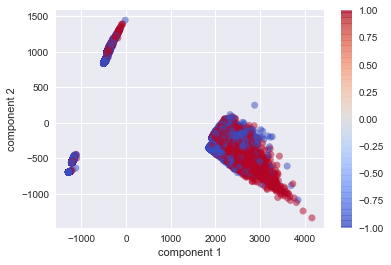

In [168]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.set_cmap('coolwarm')

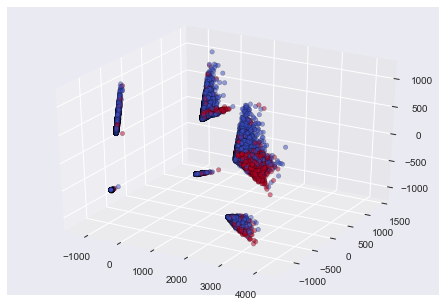

In [169]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
           c=y, edgecolor='none', alpha=0.5)

pyplot.show()